# Bharat Intern:- Machine Learning Internship

## Task_2 :- Spam Mail Detection

-------------------

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [156]:
df= pd.read_excel(r"C:\Users\Prem\Downloads\Spam Email Detection.xlsx")

In [157]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [158]:
df.shape

(5572, 5)

In [159]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [161]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [162]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [163]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [164]:
df.iloc[:,2:5]

,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
5567,NaN,NaN,NaN
5568,NaN,NaN,NaN
5569,NaN,NaN,NaN
5570,NaN,NaN,NaN


In [165]:
df= df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [166]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [167]:
df.shape

(5572, 2)

In [168]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [169]:
df= df.rename(columns={'v1':"label",'v2':'Message'})

In [170]:
df.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


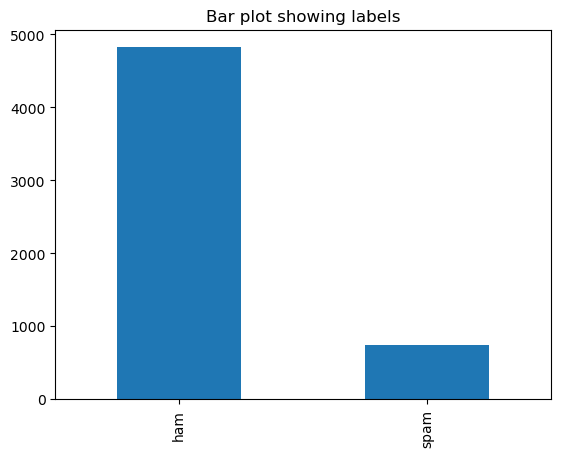

In [171]:
df.label.value_counts().plot(kind='bar')
plt.title('Bar plot showing labels')
plt.show()

In [172]:
df['label']= df['label'].map({'spam':0, 'ham':1})

In [173]:
df['Message']= df['Message'].astype(str)

spam-->0, ham-->1

In [174]:
df.label.value_counts()

1    4825
0     747
Name: label, dtype: int64

In [175]:
x= df['Message']
y= df['label']

In [176]:
df.dtypes

label       int64
Message    object
dtype: object

In [177]:
x.shape

(5572,)

In [178]:
y.shape

(5572,)

In [179]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [180]:
x_train.shape, x_test.shape

((4457,), (1115,))

In [181]:
y_train.shape, y_test.shape

((4457,), (1115,))

In [182]:
cv= CountVectorizer()

In [183]:
x_train_values=cv.fit_transform(x_train)

In [184]:
x_test_values=cv.transform(x_test)

In [185]:
Nb = MultinomialNB()

In [186]:
Nb.fit(x_train_values,y_train)

MultinomialNB()

In [187]:
nb_pred= Nb.predict(x_test_values)

In [188]:
accuracy_score(y_test,nb_pred)

0.9838565022421525

In [192]:
report=classification_report(y_test, nb_pred)

In [194]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [201]:
cm=confusion_matrix(y_test, nb_pred)

In [202]:
confusion_matrix(y_test, nb_pred)

array([[134,  16],
       [  2, 963]], dtype=int64)

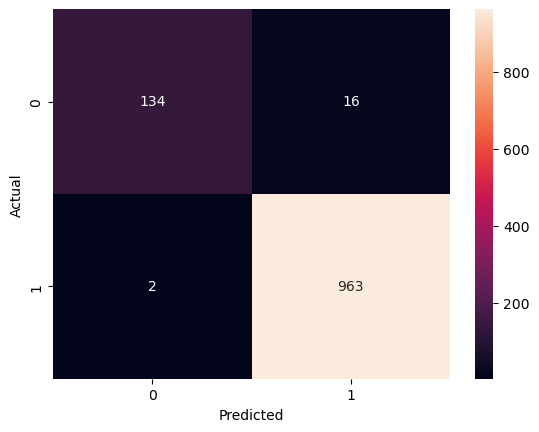

In [203]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()